## Dataset analyzation
Created: 2025-01-16
Received the complete AF predictions set as well as the complete solved structure dataset. This needs to be parsed again and data needs to be inspected

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
import numpy as np
import time
import re
from matplotlib.axes._axes import Axes as matplotlib_Axis

In [12]:
AF_prediction_path = Path("../ressources/AF_predictions").resolve()
AF_prediction_results = Path("../ressources/AF_predictions/AF_prediction_randomized_DMI_results.xlsx").resolve()
AF_prediction_metrics = Path("../ressources/AF_predictions/AF_metrics_all_structures.tsv").resolve()
AF_DMI_structures_folders = [Path("../ressources/AF_DMI_structures").resolve() / p for p in ['AF_DMI_structures1', 'AF_DMI_structures2', 'AF_DMI_structures3', "AF_DMI_mutated_structures"]]
AF_DDI_structures_path = Path("../ressources/AF_DDI_structures").resolve()
solved_DMI_structures_path = Path("../ressources/DMI_solved_structures_hydrogens").resolve()
solved_DDI_structures_path = Path("../ressources/DDI_solved_structures_hydrogens").resolve()

for p in [AF_prediction_results, AF_prediction_metrics, AF_DDI_structures_path, solved_DMI_structures_path, solved_DDI_structures_path] + AF_DMI_structures_folders:
    if not p.exists():
        print(f"{p} does not point to a valid path")

In [4]:
libpath = Path("../src").resolve()
print(libpath)
sys.path.insert(0, str(libpath))
import measure_PPI

D:\Eigene Datein\Programmieren\Git\abrilka\bachelorthesis\src


In [4]:
measure_PPI.logger.setLevel(measure_PPI.logging.INFO)

### Measure the datasets

In [11]:
pathObj = {}

for path in AF_DMI_structures_folders:
    measure_PPI.WalkFolder(path, pathObj)

measure_AF_DMI = measure_PPI.Run(list(pathObj.values()))

[2025-01-20 11:02:01,226 | measure_PPI | INFO] Found 400 structures
[2025-01-20 11:02:01,266 | measure_PPI | INFO] Found 525 structures
[2025-01-20 11:02:01,301 | measure_PPI | INFO] Found 445 structures
[2025-01-20 11:02:01,390 | measure_PPI | INFO] Found 1340 structures
[2025-01-20 11:02:01,391 | measure_PPI | INFO] Started Taskpool of None processes for 2710 files
[2025-01-20 11:02:06,394 | measure_PPI | INFO] 2% - ETA 0:03:26 | current speed 12.994 s⁻¹ | average speed 12.794 s⁻¹
[2025-01-20 11:02:11,635 | measure_PPI | INFO] 6% - ETA 0:02:33 | current speed 20.225 s⁻¹ | average speed 16.596 s⁻¹
[2025-01-20 11:02:16,638 | measure_PPI | INFO] 11% - ETA 0:01:53 | current speed 29.982 s⁻¹ | average speed 20.988 s⁻¹
[2025-01-20 11:02:19,036 | measure_PPI | WARNING] Can't parse structure LIG_LYPXL_SIV_4_2XS1 (file ranked_2.pdb) due to the following reason: Empty file.
[2025-01-20 11:02:19,036 | measure_PPI | WARNING] The strucuture LIG_LYPXL_SIV_4_2XS1 (file ranked_2.pdb) can't be opened

In [12]:
pathObj = {}
measure_PPI.WalkFolder(AF_DDI_structures_path, pathObj=pathObj)
measure_AF_DDI = measure_PPI.Run(list(pathObj.values()))

[2025-01-20 11:03:40,594 | measure_PPI | INFO] Found 480 structures
[2025-01-20 11:03:40,595 | measure_PPI | INFO] Started Taskpool of None processes for 480 files
[2025-01-20 11:03:43,821 | measure_PPI | WARNING] Can't parse structure D1PF00137_PF07850_6VQG.D2PF00244_PF01161_3AXY (file ranked_0.pdb) due to the following reason: Empty file.
[2025-01-20 11:03:43,822 | measure_PPI | WARNING] The strucuture D1PF00137_PF07850_6VQG.D2PF00244_PF01161_3AXY (file ranked_0.pdb) can't be opened
[2025-01-20 11:03:43,821 | measure_PPI | WARNING] Can't parse structure D1PF00137_PF07850_6VQG.D2PF00244_PF01161_3AXY (file ranked_0.pdb) due to the following reason: Empty file.
[2025-01-20 11:03:43,822 | measure_PPI | WARNING] The strucuture D1PF00137_PF07850_6VQG.D2PF00244_PF01161_3AXY (file ranked_0.pdb) can't be opened
[2025-01-20 11:03:43,822 | measure_PPI | WARNING] Can't parse structure D1PF00137_PF07850_6VQG.D2PF00244_PF01161_3AXY (file ranked_1.pdb) due to the following reason: Empty file.
[2025

In [13]:
pathObj = {}
measure_PPI.WalkFolder(solved_DMI_structures_path, pathObj=pathObj)
measure_solved_DMI = measure_PPI.Run(list(pathObj.values()))

[2025-01-20 11:04:35,143 | measure_PPI | INFO] Found 138 structures
[2025-01-20 11:04:35,143 | measure_PPI | INFO] Started Taskpool of None processes for 138 files
[2025-01-20 11:04:40,157 | measure_PPI | INFO] 64% - ETA 0:00:02 | current speed 17.952 s⁻¹ | average speed 17.753 s⁻¹
[2025-01-20 11:04:42,136 | measure_PPI | INFO] Finished processing 138 objects in 0:00:06 | average speed 19.736 s⁻¹


In [14]:
pathObj = {}
measure_PPI.WalkFolder(solved_DDI_structures_path, pathObj=pathObj)
measure_solved_DDI = measure_PPI.Run(list(pathObj.values()))

[2025-01-20 11:04:42,155 | measure_PPI | INFO] Found 48 structures
[2025-01-20 11:04:42,155 | measure_PPI | INFO] Started Taskpool of None processes for 48 files
[2025-01-20 11:04:47,506 | measure_PPI | INFO] 20% - ETA 0:00:20 | current speed 2.056 s⁻¹ | average speed 1.869 s⁻¹
[2025-01-20 11:04:52,595 | measure_PPI | INFO] 62% - ETA 0:00:06 | current speed 3.93 s⁻¹ | average speed 2.874 s⁻¹
[2025-01-20 11:04:57,921 | measure_PPI | INFO] 91% - ETA 0:00:01 | current speed 2.629 s⁻¹ | average speed 2.791 s⁻¹
[2025-01-20 11:05:15,236 | measure_PPI | INFO] 97% - ETA 0:00:00 | current speed 0.173 s⁻¹ | average speed 1.421 s⁻¹
[2025-01-20 11:05:15,305 | measure_PPI | INFO] Finished processing 48 objects in 0:00:33 | average speed 1.448 s⁻¹


In [15]:
#measure_AF_DDI.to_csv(Path("../ressources/AF_predictions/AF_DDI_measurements.csv"), index=False)
#measure_AF_DMI.to_csv(Path("../ressources/AF_predictions/AF_DMI_measurements.csv"), index=False)
#measure_solved_DDI.to_csv(Path("../ressources/AF_predictions/solved_DDI_measurements.csv"), index=False)
#measure_solved_DMI.to_csv(Path("../ressources/AF_predictions/solved_DMI_measurements.csv"), index=False)

### Visulize dataset for DMI

In [18]:
measure_AF_DDI = pd.read_csv(Path("../ressources/AF_predictions/AF_DDI_measurements.csv"))
measure_AF_DMI = pd.read_csv(Path("../ressources/AF_predictions/AF_DMI_measurements.csv"))
measure_solved_DDI = pd.read_csv(Path("../ressources/AF_predictions/solved_DDI_measurements.csv"))
measure_solved_DMI = pd.read_csv(Path("../ressources/AF_predictions/solved_DMI_measurements.csv"))
predictionAF = pd.read_csv(AF_prediction_metrics, sep="\t")
print("Measure AF DDI", measure_AF_DDI.shape, "DMI", measure_AF_DMI.shape)
print("Solved DDI", measure_solved_DDI.shape, "DMI", measure_solved_DMI.shape)
print("Prediction AF output", predictionAF.shape)


# Merging the measurements
measure_AF = pd.concat([measure_AF_DMI, measure_AF_DDI], ignore_index=True)
measure_AF["model_id"] = measure_AF["file"].str.replace(".pdb", "")

measure_solved = pd.concat([measure_solved_DMI, measure_solved_DDI], ignore_index=True)
measure_solved["model_id"] = measure_solved["file"].str.replace(".pdb", "")

# Fixing the lower case problem
predictionAF["prediction_name"] = predictionAF["prediction_name"].str.upper()
measure_AF["prediction_name"] = measure_AF["structure_name"].str.upper()
measure_solved["prediction_name"] = measure_solved["structure_name"].str.upper()


print("measure AF", measure_AF.shape)
print("solved AF", measure_solved.shape)

predictionAF

Measure AF DDI (463, 7) DMI (2682, 7)
Solved DDI (48, 7) DMI (138, 7)
Prediction AF output (3180, 29)
measure AF (3145, 9)
solved AF (186, 9)


,project_name,prediction_name,run_id,chainA_length,chainB_length,model_id,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,...,num_align_resi_domain,RMSD_backbone_peptide,RMSD_all_atom_peptide,known_motif_plddt,DockQ,iRMS,LRMS,Fnonnat,num_mutation_in_motif,label
0,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_0,0.887117,96.107999,77.495999,91.454999,...,312.0,1.592504,1.859964,NaN,0.878,0.604,1.575,0.087,known minimal,1
1,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_1,0.871984,95.793846,73.986000,89.736111,...,312.0,1.133857,1.553759,NaN,0.881,0.418,1.101,0.050,known minimal,1
2,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_2,0.760784,95.547501,57.906001,86.585239,...,312.0,1.792767,2.100310,NaN,0.883,0.642,1.776,0.185,known minimal,1
3,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_3,0.413662,94.646667,21.510000,76.362500,...,312.0,5.357927,6.558613,NaN,0.476,1.686,5.359,0.364,known minimal,1
4,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_4,0.359078,94.830001,19.753333,72.307001,...,312.0,9.901379,11.882125,NaN,0.223,2.929,9.909,0.889,known minimal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_0,0.298701,49.827778,73.161904,62.392307,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,random minimal DDI,0
3176,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_1,0.246961,54.362000,76.415000,66.390909,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,random minimal DDI,0
3177,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_2,0.211579,52.651538,72.910908,61.937083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,random minimal DDI,0
3178,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_3,0.211144,50.398334,78.798751,66.627144,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,random minimal DDI,0


In [19]:
regex_string = r"^([\w\-]+)_(\w{4})(_(\w+))?(\.([\w\-]*)_(\w{4}))?(\.(\w*))?$"
# Groups: 9 in total
# 0,1: ELM Instance, PDB Identifier
# 3: original sequence (mutations only)
# 5,6: random paired ELM instance, random paired PDB Identifier (random paired only)
# 8: mutatated sequence (mutations only)

measure_AF["ELM_Instance"] = measure_AF.apply(lambda row: r.groups()[0] if (r:= re.search(regex_string, row["structure_name"])) is not None else None, axis=1)
measure_AF["PDB_ID"] = measure_AF.apply(lambda row: r.groups()[1] if (r:= re.search(regex_string, row["structure_name"])) is not None else None, axis=1)
#measure_AF["ELM_Instance_RandomPaired"] = measure_AF.apply(lambda row: r.groups()[5] if (r:= re.search(regex_string, row["structure_name"])) is not None else None, axis=1)
#measure_AF["PDB_ID_RandomPaired"] = measure_AF.apply(lambda row: r.groups()[6] if (r:= re.search(regex_string, row["structure_name"])) is not None else None, axis=1)
#measure_AF["Sequence_Ini"] = measure_AF.apply(lambda row: r.groups()[3] if (r:= re.search(regex_string, row["structure_name"])) is not None else None, axis=1)
#measure_AF["Sequence_Mutated"] = measure_AF.apply(lambda row: r.groups()[8] if (r:= re.search(regex_string, row["structure_name"])) is not None else None, axis=1)
measure_AF

,structure_name,file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions,model_id,prediction_name,ELM_Instance,PDB_ID
0,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,9,0,613.651,6.063,0,ranked_0,DEG_APCC_KENBOX_2_4GGD,DEG_APCC_KENBOX_2,4GGD
1,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,9,0,580.310,6.083,0,ranked_1,DEG_APCC_KENBOX_2_4GGD,DEG_APCC_KENBOX_2,4GGD
2,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,10,0,662.104,6.072,3,ranked_2,DEG_APCC_KENBOX_2_4GGD,DEG_APCC_KENBOX_2,4GGD
3,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,2,0,398.498,5.417,0,ranked_3,DEG_APCC_KENBOX_2_4GGD,DEG_APCC_KENBOX_2,4GGD
4,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,2,0,323.304,5.092,9,ranked_4,DEG_APCC_KENBOX_2_4GGD,DEG_APCC_KENBOX_2,4GGD
...,...,...,...,...,...,...,...,...,...,...,...
3140,PF18773_PF00071_2X19_B_resi392_resi451.A_resi9...,ranked_0.pdb,4,2,1462.636,5.473,19,ranked_0,PF18773_PF00071_2X19_B_RESI392_RESI451.A_RESI9...,PF18773_PF00071,2X19
3141,PF18773_PF00071_2X19_B_resi392_resi451.A_resi9...,ranked_1.pdb,3,3,1315.682,4.998,21,ranked_1,PF18773_PF00071_2X19_B_RESI392_RESI451.A_RESI9...,PF18773_PF00071,2X19
3142,PF18773_PF00071_2X19_B_resi392_resi451.A_resi9...,ranked_2.pdb,5,1,961.536,5.986,4,ranked_2,PF18773_PF00071_2X19_B_RESI392_RESI451.A_RESI9...,PF18773_PF00071,2X19
3143,PF18773_PF00071_2X19_B_resi392_resi451.A_resi9...,ranked_3.pdb,6,5,1280.741,3.407,32,ranked_3,PF18773_PF00071_2X19_B_RESI392_RESI451.A_RESI9...,PF18773_PF00071,2X19


In [ ]:
measure_AF

In [20]:
dataAF = pd.merge(
    left=predictionAF,
    right=measure_AF,
    how="inner",
    left_on=["prediction_name", "model_id"],
    right_on=["prediction_name", "model_id"]
)
dataAF_null = dataAF[np.logical_or(dataAF["run_id"].isnull(), dataAF["salt_bridges"].isnull())]
print("Outer join", dataAF.shape, "Failed joins", dataAF_null.shape)
display(dataAF_null)
print(dataAF.columns)
dataAF

Outer join (3125, 38) Failed joins (0, 38)


,project_name,prediction_name,run_id,chainA_length,chainB_length,model_id,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,...,label,structure_name,file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions,ELM_Instance,PDB_ID


Index(['project_name', 'prediction_name', 'run_id', 'chainA_length',
       'chainB_length', 'model_id', 'model_confidence',
       'chainA_intf_avg_plddt', 'chainB_intf_avg_plddt', 'intf_avg_plddt',
       'pDockQ', 'iPAE', 'num_chainA_intf_res', 'num_chainB_intf_res',
       'num_res_res_contact', 'num_atom_atom_contact', 'RMSD_domain',
       'num_align_atoms_domain', 'align_score_domain', 'num_align_resi_domain',
       'RMSD_backbone_peptide', 'RMSD_all_atom_peptide', 'known_motif_plddt',
       'DockQ', 'iRMS', 'LRMS', 'Fnonnat', 'num_mutation_in_motif', 'label',
       'structure_name', 'file', 'hbonds', 'salt_bridges', 'buried_area',
       'min_distance', 'hydrophobic_interactions', 'ELM_Instance', 'PDB_ID'],
      dtype='object')


,project_name,prediction_name,run_id,chainA_length,chainB_length,model_id,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,...,label,structure_name,file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions,ELM_Instance,PDB_ID
0,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_0,0.887117,96.107999,77.495999,91.454999,...,1,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,9,0,613.651,6.063,0,DEG_APCC_KENBOX_2,4GGD
1,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_1,0.871984,95.793846,73.986000,89.736111,...,1,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,9,0,580.310,6.083,0,DEG_APCC_KENBOX_2,4GGD
2,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_2,0.760784,95.547501,57.906001,86.585239,...,1,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,10,0,662.104,6.072,3,DEG_APCC_KENBOX_2,4GGD
3,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_3,0.413662,94.646667,21.510000,76.362500,...,1,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,2,0,398.498,5.417,0,DEG_APCC_KENBOX_2,4GGD
4,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_4,0.359078,94.830001,19.753333,72.307001,...,1,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,2,0,323.304,5.092,9,DEG_APCC_KENBOX_2,4GGD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3120,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_0,0.298701,49.827778,73.161904,62.392307,...,0,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_0.pdb,7,3,1617.382,5.591,56,D1PF18773_PF00071,2X19
3121,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_1,0.246961,54.362000,76.415000,66.390909,...,0,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_1.pdb,3,0,791.256,6.373,7,D1PF18773_PF00071,2X19
3122,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_2,0.211579,52.651538,72.910908,61.937083,...,0,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_2.pdb,2,1,882.547,7.906,11,D1PF18773_PF00071,2X19
3123,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_3,0.211144,50.398334,78.798751,66.627144,...,0,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_3.pdb,7,5,1020.896,4.628,44,D1PF18773_PF00071,2X19


In [21]:
dataAF

,project_name,prediction_name,run_id,chainA_length,chainB_length,model_id,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,...,label,structure_name,file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions,ELM_Instance,PDB_ID
0,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_0,0.887117,96.107999,77.495999,91.454999,...,1,DEG_APCC_KENBOX_2_4GGD,ranked_0.pdb,9,0,613.651,6.063,0,DEG_APCC_KENBOX_2,4GGD
1,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_1,0.871984,95.793846,73.986000,89.736111,...,1,DEG_APCC_KENBOX_2_4GGD,ranked_1.pdb,9,0,580.310,6.083,0,DEG_APCC_KENBOX_2,4GGD
2,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_2,0.760784,95.547501,57.906001,86.585239,...,1,DEG_APCC_KENBOX_2_4GGD,ranked_2.pdb,10,0,662.104,6.072,3,DEG_APCC_KENBOX_2,4GGD
3,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_3,0.413662,94.646667,21.510000,76.362500,...,1,DEG_APCC_KENBOX_2_4GGD,ranked_3.pdb,2,0,398.498,5.417,0,DEG_APCC_KENBOX_2,4GGD
4,AlphaFold_benchmark,DEG_APCC_KENBOX_2_4GGD,run37,312,5,ranked_4,0.359078,94.830001,19.753333,72.307001,...,1,DEG_APCC_KENBOX_2_4GGD,ranked_4.pdb,2,0,323.304,5.092,9,DEG_APCC_KENBOX_2,4GGD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3120,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_0,0.298701,49.827778,73.161904,62.392307,...,0,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_0.pdb,7,3,1617.382,5.591,56,D1PF18773_PF00071,2X19
3121,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_1,0.246961,54.362000,76.415000,66.390909,...,0,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_1.pdb,3,0,791.256,6.373,7,D1PF18773_PF00071,2X19
3122,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_2,0.211579,52.651538,72.910908,61.937083,...,0,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_2.pdb,2,1,882.547,7.906,11,D1PF18773_PF00071,2X19
3123,AlphaFold_benchmark_DDI,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,run6,60,113,ranked_3,0.211144,50.398334,78.798751,66.627144,...,0,D1PF18773_PF00071_2X19.D2PF00009_PF01873_2D74,ranked_3.pdb,7,5,1020.896,4.628,44,D1PF18773_PF00071,2X19


In [22]:
dataAF.to_csv(AF_prediction_path / "data_af.csv", index=False)

Sample names for regex match:

DMI: <br>
known minimal:          DEG_APCC_KENBOX_2_4GGD                                                          TRG_AP2beta_CARGO_1_2G30 <br>
random minimal:         MDEG_APCC_KENBOX_2_4GGD.DTRG_AP2beta_CARGO_1_2G30 <br>
1 or 2 mutations:       DEG_APCC_KENBOX_2_4GGD_SKENV.SGENV <br>


DDI: <br>
approved minimal DDI:   PF00009_PF01873_2d74_A_resi12_resi200.B_resi21_resi133 <br>
random minimal DDI:     D1PF00009_PF01873_2D74.D2PF00026_PF06394_1F34


In [78]:
# Split dataset on mutation type

dataAF_DMI = pd.merge(
    left=predictionAF, 
    right=measure_AF_DMI,
    how='inner',
    left_on=['prediction_name', 'model_id'],
    right_on=['prediction_name', 'file'], 
)

dataAF_DMI = dataAF_DMI[dataAF_DMI.apply(lambda r: not isinstance(r["num_mutation_in_motif"], int), axis=1)]



dataAF_DMI

#dataAF_DMI.drop(columns=["file", "structure_name"], inplace=True)
# Search for structure_name

""


In [80]:
dataAF_DMI.shape

(0, 0)

In [ ]:
_measure_AF_DMI = measure_AF_DMI.copy()
_measure_AF_DMI["structure"] = dataAF.apply(lambda row: None if not (r := re.search(r"^([\w_]+)_([\w]{4})$", row["prediction_name"])) or len(r.groups()) != 2 else r.groups()[1], axis=1)

In [8]:
measureAF = pd.read_csv(Path("../ressources//af_structures.csv"))
measureSolved = pd.read_csv(Path("../ressources//solved_structures.csv"))
predictionAF = pd.read_excel(Path("../ressources/ISS AF_DMI_structures/AF_prediction_randomized_DMI_results.xlsx"))

predictionAF["model_id"] = predictionAF["model_id"] + ".pdb"

dataAF = pd.merge(
    left=measureAF, 
    right=predictionAF,
    how='inner',
    left_on=['structure_name', 'file'],
    right_on=['prediction_name', 'model_id'],
)

FileNotFoundError: [Errno 2] No such file or directory: '..\\ressources\\ISS AF_DMI_structures\\AF_prediction_randomized_DMI_results.xlsx'

In [14]:
measurement.to_csv(Path("../ressources/af_structures.csv"), index=False)

## Plots

In [5]:
print(set(dataAF["num_mutation_in_motif"]))

{'2', 'random minimal DDI', '1', 'known minimal', 'approved minimal DDI', 'random minimal'}


In [23]:
dataAF["min_distance"] = dataAF["min_distance"].fillna(20)

In [6]:
dataAF[dataAF["min_distance"].isna()]

,project_name,prediction_name,run_id,chainA_length,chainB_length,model_id,model_confidence,chainA_intf_avg_plddt,chainB_intf_avg_plddt,intf_avg_plddt,...,Fnonnat,num_mutation_in_motif,label,structure_name,file,hbonds,salt_bridges,buried_area,min_distance,hydrophobic_interactions
336,AlphaFold_benchmark,LIG_HOMEOBOX_1B72,run37,73,4,ranked_1,0.206933,0.0,0.0,0.0,...,0.0,known minimal,1,LIG_HOMEOBOX_1B72,ranked_1.pdb,0,0,0.000,NaN,0
339,AlphaFold_benchmark,LIG_HOMEOBOX_1B72,run37,73,4,ranked_4,0.166276,0.0,0.0,0.0,...,0.0,known minimal,1,LIG_HOMEOBOX_1B72,ranked_4.pdb,0,0,0.000,NaN,0
388,AlphaFold_benchmark,LIG_LYPXL_S_1_2R03,run37,697,5,ranked_2,0.218808,0.0,0.0,0.0,...,0.0,known minimal,1,LIG_LYPXL_S_1_2R03,ranked_2.pdb,0,0,-0.000,NaN,0
389,AlphaFold_benchmark,LIG_LYPXL_S_1_2R03,run37,697,5,ranked_3,0.215194,0.0,0.0,0.0,...,0.0,known minimal,1,LIG_LYPXL_S_1_2R03,ranked_3.pdb,0,0,0.000,NaN,0
390,AlphaFold_benchmark,LIG_LYPXL_S_1_2R03,run37,697,5,ranked_4,0.207079,0.0,0.0,0.0,...,0.0,known minimal,1,LIG_LYPXL_S_1_2R03,ranked_4.pdb,0,0,-0.000,NaN,0
711,AlphaFold_benchmark,MDEG_SPOP_SBC_1_3HQM.DDOC_MIT_MIM_1_2JQ9,run38,71,5,ranked_4,0.178505,0.0,0.0,0.0,...,NaN,random minimal,0,MDEG_SPOP_SBC_1_3HQM.DDOC_MIT_MIM_1_2JQ9,ranked_4.pdb,0,0,0.000,NaN,0
815,AlphaFold_benchmark,MDOC_USP7_UBL2_3_4YOC.DTRG_ER_FFAT_1_2RR3,run38,125,5,ranked_3,0.236131,0.0,0.0,0.0,...,NaN,random minimal,0,MDOC_USP7_UBL2_3_4YOC.DTRG_ER_FFAT_1_2RR3,ranked_3.pdb,0,0,0.000,NaN,0
816,AlphaFold_benchmark,MDOC_USP7_UBL2_3_4YOC.DTRG_ER_FFAT_1_2RR3,run38,125,5,ranked_4,0.221122,0.0,0.0,0.0,...,NaN,random minimal,0,MDOC_USP7_UBL2_3_4YOC.DTRG_ER_FFAT_1_2RR3,ranked_4.pdb,0,0,-0.000,NaN,0
851,AlphaFold_benchmark,MLIG_AP2ALPHA_1_1KY7.DLIG_PAM2_1_1JGN,run38,73,5,ranked_4,0.203112,0.0,0.0,0.0,...,NaN,random minimal,0,MLIG_AP2alpha_1_1KY7.DLIG_PAM2_1_1JGN,ranked_4.pdb,0,0,0.000,NaN,0
864,AlphaFold_benchmark,MLIG_ARL_BART_1_4ZI2.DLIG_LYPXL_SIV_4_2XS1,run38,697,8,ranked_2,0.367870,0.0,0.0,0.0,...,NaN,random minimal,0,MLIG_ARL_BART_1_4ZI2.DLIG_LYPXL_SIV_4_2XS1,ranked_2.pdb,0,0,0.000,NaN,0


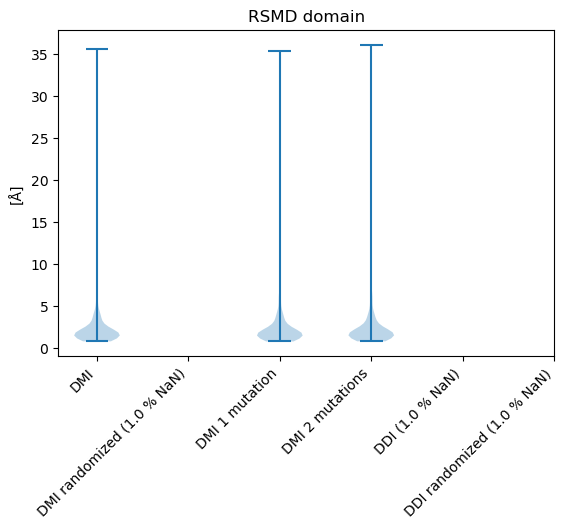

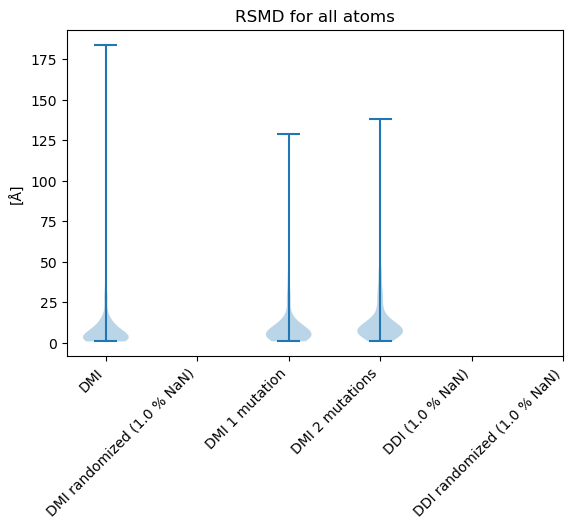

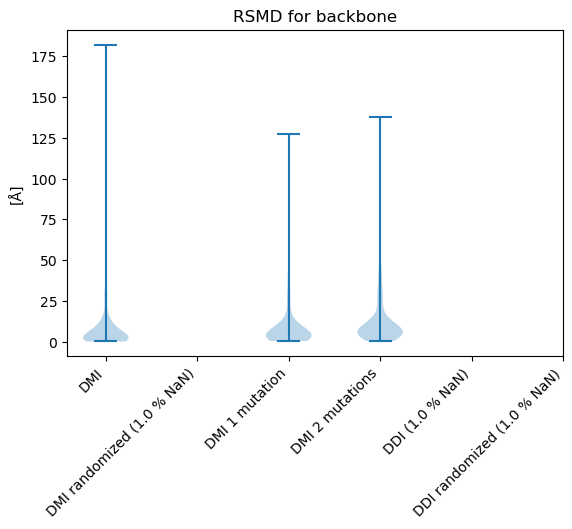

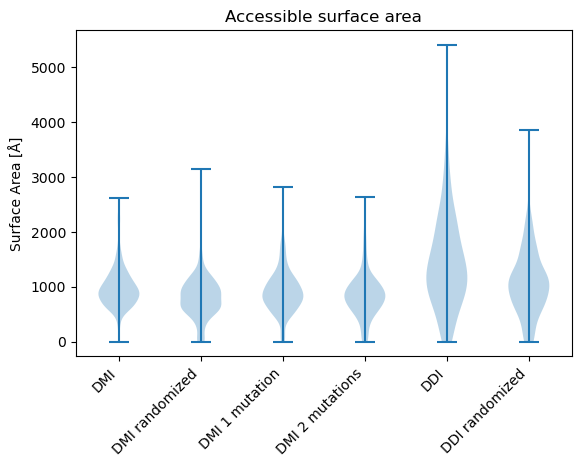

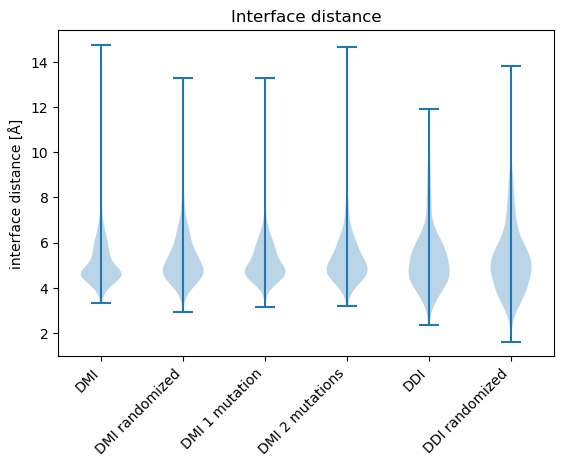

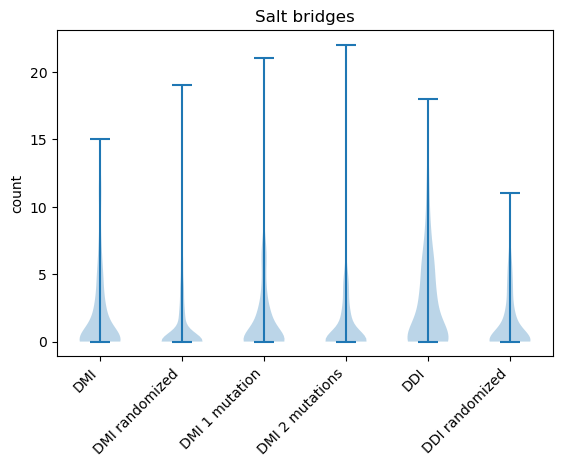

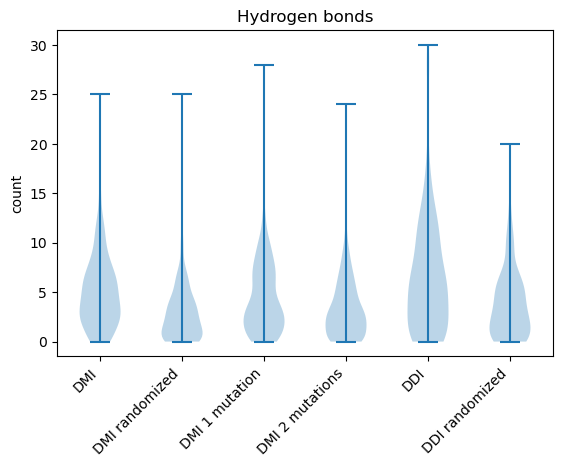

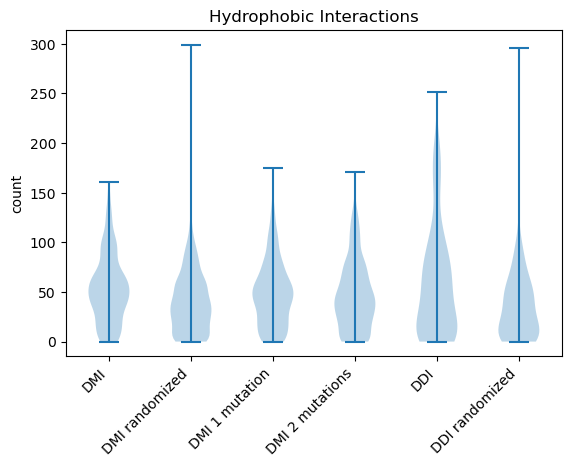

In [22]:
rnd = np.random.default_rng(seed=2501)

columns = {
    "RMSD_domain": ["RSMD domain", "[Å]"],
    "RMSD_all_atom_peptide": ["RSMD for all atoms", "[Å]"],
    "RMSD_backbone_peptide": ["RSMD for backbone", "[Å]"],
    "buried_area": ["Accessible surface area", "Surface Area [Å]"],
    "min_distance": ["Interface distance", "interface distance [Å]"],
    "salt_bridges": ["Salt bridges", "count"],
    "hbonds" : ["Hydrogen bonds", "count"],
    "hydrophobic_interactions": ["Hydrophobic Interactions", "count"],
}
#fig, axes = plt.subplots(len(columns), 1, figsize=(10, 10*len(columns)))
for i, (column, (title, y_label)) in enumerate(columns.items()):
    #ax: matplotlib_Axis = axes[i]
    paired_DMI = dataAF[dataAF["num_mutation_in_motif"] == "known minimal"][column].to_numpy()
    random_DMI = dataAF[dataAF["num_mutation_in_motif"] == "random minimal"][column].to_numpy()
    mutated1_DMI = dataAF[dataAF["num_mutation_in_motif"] == "1"][column].to_numpy()
    mutated2_DMI = dataAF[dataAF["num_mutation_in_motif"] == "2"][column].to_numpy()
    paired_DDI = dataAF[dataAF["num_mutation_in_motif"] == "approved minimal DDI"][column].to_numpy()
    random_DDI = dataAF[dataAF["num_mutation_in_motif"] == "random minimal DDI"][column].to_numpy()
    paired_DMI_nan_ratio = np.count_nonzero(np.isnan(paired_DMI)) / len(paired_DMI) if len(paired_DMI) != 0 else 0
    random_DMI_nan_ratio = np.count_nonzero(np.isnan(random_DMI)) / len(random_DMI) if len(random_DMI) != 0 else 0
    mutated1_DMI_nan_ratio = np.count_nonzero(np.isnan(mutated1_DMI)) / len(mutated1_DMI) if len(mutated1_DMI) != 0 else 0
    mutated2_DMI_nan_ratio = np.count_nonzero(np.isnan(mutated2_DMI)) / len(mutated2_DMI) if len(mutated2_DMI) != 0 else 0
    paired_DDI_nan_ratio = np.count_nonzero(np.isnan(paired_DDI)) / len(paired_DDI) if len(paired_DDI) != 0 else 0
    random_DDI_nan_ratio = np.count_nonzero(np.isnan(random_DDI)) / len(random_DDI) if len(random_DDI) != 0 else 0
    paired_DMI = paired_DMI[~np.isnan(paired_DMI)]
    random_DMI = random_DMI[~np.isnan(random_DMI)]
    mutated1_DMI = mutated1_DMI[~np.isnan(mutated1_DMI)]
    mutated2_DMI = mutated2_DMI[~np.isnan(mutated2_DMI)]
    paired_DDI = paired_DDI[~np.isnan(paired_DDI)]
    random_DDI = random_DDI[~np.isnan(random_DDI)]

    labels = ["DMI", "DMI randomized", "DMI 1 mutation", "DMI 2 mutations", "DDI", "DDI randomized"]

    _data = [paired_DMI, random_DMI, mutated1_DMI, mutated2_DMI, paired_DDI, random_DDI]
    _positions = [x for x in range(len(_data))]
    for i in range(len(_data)-1, -1, -1):
        if len(_data[i]) == 0:
            del _data[i]
            del _positions[i]

    plt.violinplot(_data, _positions)
    #plt.violinplot({"DMI": random_DMI, "DMI randomized": random_DMI, "DMI 1 mutation": mutated1_DMI, "DMI 2 mutations": mutated2_DMI, "DDI": paired_DDI, "DDI randomized": random_DDI})

    """labels = []
    for i, (label, data) in enumerate({"DMI": random_DMI, "DMI randomized": random_DMI, "DMI 1 mutation": mutated1_DMI, "DMI 2 mutations": mutated2_DMI, "DDI": paired_DDI, "DDI randomized": random_DDI}.items()):
        _line = ax.scatter(rnd.normal(i, 0.1, size=len(data)), data)
        _nc = _line.get_facecolor()[0]
        _nc[3] = 0.1
        _line.set_facecolor(_nc)
        _line.set_edgecolor(_nc)
        labels.append(label)"""
    for i2, p in enumerate([paired_DMI_nan_ratio, random_DMI_nan_ratio, mutated1_DMI_nan_ratio, mutated2_DMI_nan_ratio, paired_DDI_nan_ratio, random_DDI_nan_ratio]):
        if p > 0.5:
            labels[i2] = f"{labels[i2]} ({round(p, 1)} % NaN)"
            

    plt.title(title)
    plt.ylabel(y_label)
    plt.xticks(range(len(labels)), labels)
    #ax.set_title(title)
    #ax.set_ylabel(y_label)
    #ax.set_xticks(range(len(labels)), labels)

    plt.gcf().autofmt_xdate(rotation=45)
    plt.show()

In [42]:
rm = dataAF[dataAF["num_mutation_in_motif"] == "random minimal"]
set(rm["hbonds"])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 17, 18, 19, 20, 21, 25}

In [ ]:
def plotCummulative(column, title, ylabel, xlabel, norm=False):
    plt.title(title)
    pos = dataAF_positive[column].dropna()
    neg = dataAF_negative[column].dropna()
    sol = measureSolved[column].dropna()

    
    plt.ecdf(pos, color="green")
    plt.ecdf(neg, color="orange")
    plt.ecdf(sol, color="blue")
    plt.vlines(np.mean(pos), ymin=0, ymax=1, label="positive", colors="green", linestyles="dotted")
    plt.vlines(np.mean(neg), ymin=0, ymax=1, label="negative", colors="orange", linestyles="dotted")
    plt.vlines(np.mean(sol), ymin=0, ymax=1, label="solved", colors="blue", linestyles="dotted")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.legend()
    plt.show()
plotCummulative("hbonds", "hydrogen bonds", "cummulative percentile", "count of hydrogen bonds")
plotCummulative("salt_bridges", "salt bridges", "cummulative percentile", "count of hydrogen bonds")
plotCummulative("buried_area", "surface area", "cummulative percentile", "area [Å²]")
plotCummulative("min_distance", "minimum interface distance ", "cummulative percentile", "distance [Å]")
plotCummulative("hydrophobic_interactions", "hydrophobic interactions", "cummulative percentile", "count")